# 3.3 Decision Tree (titanic)

In this tutorial, we will build a decision tree model to predict whether a person on the Titanic will survive


**Data Features and meanings**
- survival
    - Survival - 0 = No, 1 = Yes
- pclass
    - Ticket class - 1 = 1st, 2 = 2nd, 3 = 3rd
- sex
    - Sex	
- Age
    - Age in years	
- sibsp
    - #of siblings / spouses aboard the Titanic	
- parch
    - #of parents / children aboard the Titanic	
- ticket
    - Ticket number	
- fare
    - Passenger fare	
- cabin
    - Cabin number	
- embarked
    - Port of Embarkation - C = Cherbourg, Q = Queenstown, S = Southampton

## Importing the libraries

In [ ]:
!pip install pandas-profiling
!pip install ipywidgets
!pip install --upgrade Pillow

In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set()

## Part 1: Load  data

In [3]:
# titanic_data = pd.read_csv('./data/titanic.csv')
titanic_data = pd.read_csv('https://docs.google.com/spreadsheets/d/1_VLG-QVuEQFaABcsXxWmG1ASV-SVcEoEvoFDH8pUN4A/gviz/tq?tqx=out:csv&sheet=titanic')

In [4]:
titanic_data.head(5)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch    Ticket     Fare Cabin Embarked  
0      0       NaN   7.2500   NaN        S  
1      0       NaN  71.2833   C85        C  
2      0       NaN   7.9250   NaN        S  
3      0  113803.0  53.1000  C123        S  
4      0  373450.0   8.0500   NaN        S

In [5]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       661 non-null    float64
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(3), int64(5), object(4)
memory usage: 83.7+ KB


In [6]:
from ydata_profiling import ProfileReport
ProfileReport(titanic_data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Removing Columns With Too Much Missing Data

In [7]:
titanic_data.drop('Cabin', axis=1, inplace = True)

### Removing Null Data From Our Data Set

In [8]:
# Check missing value in data
titanic_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket         230
Fare             0
Embarked         2
dtype: int64

In [9]:
# define imputation function
def impute_missing_age(columns):
    age = columns[0]
    passenger_class = columns[1]
    if pd.isnull(age):
        if(passenger_class == 1):
            return titanic_data[titanic_data['Pclass'] == 1]['Age'].mean()
        elif(passenger_class == 2):
            return titanic_data[titanic_data['Pclass'] == 2]['Age'].mean()
        elif(passenger_class == 3):
            return titanic_data[titanic_data['Pclass'] == 3]['Age'].mean()
    else:
        return age

# apply the function to every row in the titanic DataFrame.
titanic_data['Age'] = titanic_data[['Age', 'Pclass']].apply(impute_missing_age, axis = 1)

In [10]:
# drop Missing value
titanic_data.dropna(inplace = True)

### Handling Categorical Data With Dummy Variables

In [11]:
# to avoid multicollinearity
titanic_data=pd.get_dummies(titanic_data,columns=['Sex','Embarked'],prefix='',prefix_sep='',drop_first = True)

In [12]:
# check dataframe columns
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'male', 'Q', 'S'],
      dtype='object')

Removing some columns we decide not to use from the dataset

In [13]:
titanic_data.drop(['PassengerId','Name', 'Ticket'], axis = 1, inplace = True)

In [14]:
# check dataframe columns
titanic_data.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q',
       'S'],
      dtype='object')

correlation

<Axes: >

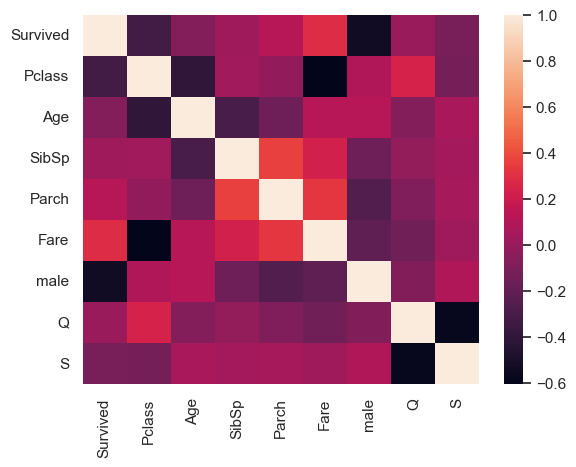

In [15]:
sns.heatmap(titanic_data.corr())

## Train/Test separation

X/y separation

In [16]:
y_data = titanic_data['Survived']
x_data = titanic_data.drop('Survived', axis = 1)

Perform hold-out method
- 70% training set
- 30% testing set

In [17]:
from sklearn.model_selection import train_test_split
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x_data, y_data, test_size = 0.3,random_state=0)

# Part 3: Train a decision tree model

In [18]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=0, criterion='entropy')
model

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [19]:
model.fit(x_training_data, y_training_data)

DecisionTreeClassifier(criterion='entropy', random_state=0)

Making Predictions With Our Model

In [20]:
predictions = model.predict(x_test_data)

### Part 4: Model Evaluation

Evaluation metrics
- confusion metrix
- accuracy
- precision, recall, f1-score

Measuring the Performance

In [21]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print("Accuracy:\t %.3f" %accuracy_score(y_test_data, predictions))
print(classification_report(y_test_data, predictions))

Accuracy:	 0.798
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       119
           1       0.75      0.73      0.74        79

    accuracy                           0.80       198
   macro avg       0.79      0.79      0.79       198
weighted avg       0.80      0.80      0.80       198



confusion matrix

accuracy:  0.797979797979798
Confusion matrix, without normalization
[[100  19]
 [ 21  58]]
Normalized confusion matrix
[[0.84033613 0.15966387]
 [0.26582278 0.73417722]]


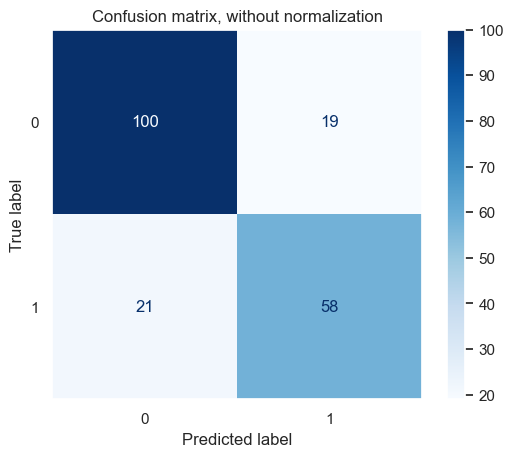

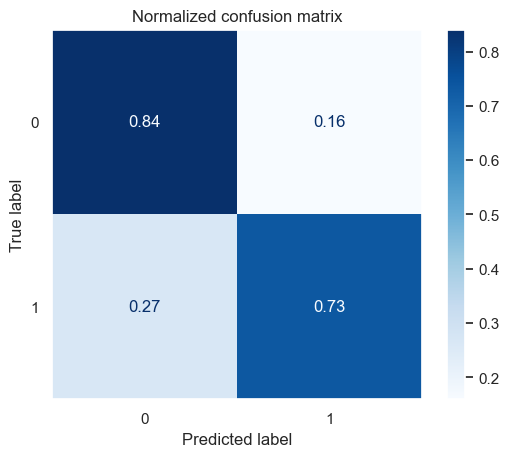

In [22]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score

print("accuracy: ", accuracy_score(y_test_data, predictions))

# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        model,
        x_test_data,
        y_test_data,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)
    plt.grid(False)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Visualizing the decision tree

In [23]:
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(model, out_file=None, 
                              feature_names=x_training_data.columns,
                              class_names=['0','1'],
                              filled=True, rounded=True,
                              special_characters=True, rotate=True)
graph = graphviz.Source(dot_data)
graph.render('dtree_render')

'dtree_render.pdf'

### Part 5: Model tuning

#### Try tuning the model to see if you can make it perform better?


You can look at the parameters and functions of Decision Tree Classifier at https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

## Try tuning Hyperparameter
***Note that to do this properly, you should split data into train/validation/test set and tune them on validation set, not test set***


In [24]:
model = DecisionTreeClassifier(criterion='entropy', 
                               splitter='best', 
                               max_depth=3, 
                               min_samples_split=2, 
                               min_samples_leaf=1, 
                               min_weight_fraction_leaf=0.0, 
                               max_features=None, 
                               random_state=None, 
                               max_leaf_nodes=None, 
                               min_impurity_decrease=0.0, 
                               class_weight=None, 
                               ccp_alpha=0.0)
model.fit(x_training_data, y_training_data)
predictions = model.predict(x_test_data)
print("Accuracy:\t %.3f" %accuracy_score(y_test_data, predictions))
print(classification_report(y_test_data, predictions))

Accuracy:	 0.818
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       119
           1       0.83      0.68      0.75        79

    accuracy                           0.82       198
   macro avg       0.82      0.80      0.80       198
weighted avg       0.82      0.82      0.81       198



In [25]:
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(model, out_file=None, 
                              feature_names=x_training_data.columns,
                              class_names=['0','1'],
                              filled=True, rounded=True,
                              special_characters=True, rotate=True)
graph = graphviz.Source(dot_data)
graph.render('dtree_render_maxdepth_3')

'dtree_render_maxdepth_3.pdf'

## Feature importance

[0.17119306 0.08304145 0.         0.         0.21014038 0.53562512
 0.         0.        ]


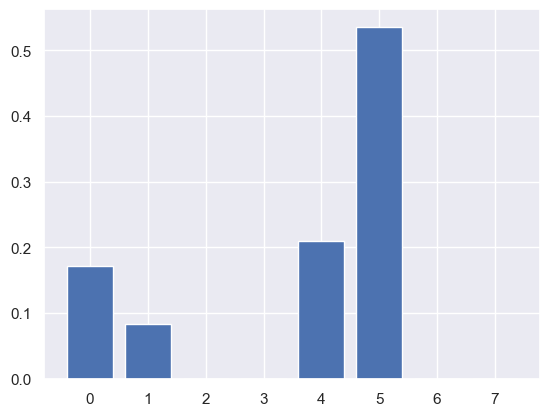

In [26]:
importances = model.feature_importances_
print(importances)

from matplotlib import pyplot
# plot
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()

In [27]:
lr_feature_m = pd.DataFrame({'feature':x_training_data.columns,
                             'Score':model.feature_importances_})

lr_feature_m.sort_values(by = 'Score', ascending=False).head()

feature     Score
5    male  0.535625
4    Fare  0.210140
0  Pclass  0.171193
1     Age  0.083041
2   SibSp  0.000000